<a href="https://colab.research.google.com/github/Nguyen-Ngoc-Minh-Thu/ML2023_TV201/blob/main/Lab_4_20130421_NguyenNgocMinhThu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [1]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [2]:
# code
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




Accuracy :  0.9777777777777777
Confusion Matrix : 
 [[10  0  0]
 [ 0 15  0]
 [ 0  1 19]]


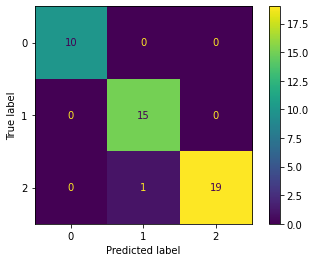

In [3]:
# code
dataSet = datasets.load_iris()
x = dataSet['data']
y = dataSet['target']
x_train, x_test, y_train, y_test = train_test_split(dataSet.data, dataSet.target, test_size=0.3)
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred) 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



Accuracy :  0.9537037037037037
Confusion Matrix : 
 [[10  0  0]
 [ 0 15  0]
 [ 0  1 19]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


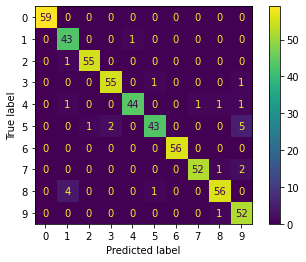

In [4]:
# code
# load the MNIST digits dataset
mnist = datasets.load_digits()
x = mnist['data']
y = mnist['target']
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3)
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train) 
y_pred = classifier.predict(x_test)
cm_2 = confusion_matrix(y_test, y_pred) 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


Accuracy: [0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9111111111111111, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8444444444444444, 0.8666666666666667, 0.8444444444444444]
Precision: [0.9597883597883597, 0.9597883597883597, 0.9597883597883597, 0.9137566137566138, 0.8949494949494949, 0.8949494949494949, 0.8949494949494949, 0.8949494949494949, 0.8771014492753624, 0.8771014492753624, 0.8677248677248678, 0.8677248677248678, 0.8437606837606839, 0.8677248677248678, 0.8437606837606839]
Recall: [0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9111111111111111, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8444444444444444, 0.8666666666666667, 0.8444444444444444]
F1-score: [0.954957264957265, 0.954957264957265, 0.954957264957265, 

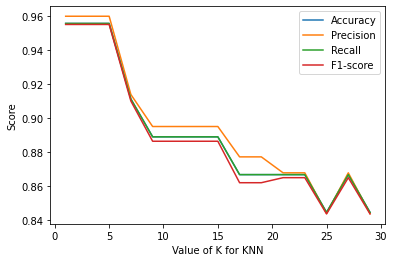

Gia tri tot nhat cua k: 1


In [11]:
# code
data_task3 = datasets.load_iris()
x = data_task3.data
y = data_task3.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
k_value = range(1, 30, 2)
accuracy = []
precision = []
recall = []
f1 = []
for k in k_value:
  kNN = KNeighborsClassifier(n_neighbors = k)
  kNN.fit(x_train, y_train)
  y_pred = kNN.predict(x_test)
  accuracy.append(accuracy_score(y_test, y_pred))
  precision.append(precision_score(y_test, y_pred, average='weighted'))
  recall.append(recall_score(y_test, y_pred, average='weighted'))
  f1.append(f1_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# ve do thi bieu dien su thay doi cua do chinh xac precision, recall va F1-score
plt.plot(k_value, accuracy, label='Accuracy')
plt.plot(k_value, precision, label='Precision')
plt.plot(k_value, recall, label='Recall')
plt.plot(k_value, f1, label='F1-score')
plt.xlabel('Value of K for KNN')
plt.ylabel('Score')
plt.legend()
plt.show()

# gia tri tot nhat của k
best_k = k_value[accuracy.index(max(accuracy))]
print('Gia tri tot nhat cua k:', best_k) 

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


Accuracy:  [1.0, 1.0, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]
Precision:  [1.0, 1.0, 1.0, 0.9793650793650793, 0.9793650793650793, 0.9793650793650793, 0.9793650793650793, 0.9793650793650793, 0.9793650793650793, 0.9793650793650793, 0.9793650793650793, 0.9793650793650793, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]
Recall:  [1.0, 1.0, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]
F1-score:  [1.0, 1.0, 1.0, 0.9778061586490706, 0.9778061586490706, 0.9778061586490706, 0.9778061586490706, 0.9778061586490706, 0.9778061586490706, 0.9778061586490706, 0.9778061586490706, 0.97780615864

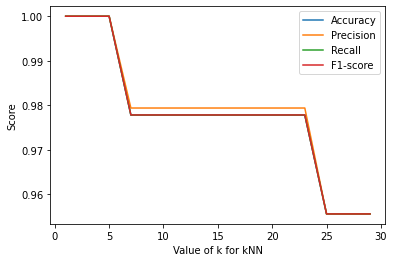

Gia tri tot nhat cua k:  1


In [12]:
# code
mnist = datasets.load_iris()
x = mnist.data
y = mnist.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)
k_range = range(1, 30, 2)
accuracy = []
precision = []
recall = []
f1 = []
for k in k_range:
  kNN = KNeighborsClassifier(n_neighbors = k)
  kNN.fit(x_train, y_train)
  y_pred = kNN.predict(x_test)
  accuracy.append(accuracy_score(y_test, y_pred))
  precision.append(precision_score(y_test, y_pred, average = 'weighted'))
  recall.append(recall_score(y_test, y_pred, average = 'weighted'))
  f1.append(f1_score(y_test, y_pred, average = 'weighted'))
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)

# ve do thi bieu dien su thay doi cua do chinh xac precision, recall va F1-score
plt.plot(k_range, accuracy, label = 'Accuracy')
plt.plot(k_range, precision, label = 'Precision')
plt.plot(k_range, recall, label = 'Recall')
plt.plot(k_range, f1, label = 'F1-score')
plt.xlabel('Value of k for kNN')
plt.ylabel('Score')
plt.legend()
plt.show()

# gia tri tot nhat cua k
best_k = k_range[accuracy.index(max(accuracy))]
print('Gia tri tot nhat cua k: ', best_k)

#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [13]:
# code
# Load data
data = pd.read_csv('spambase.data')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Train and evaluate decision tree classifier
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
bal_acc_tree = balanced_accuracy_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Train and evaluate kNN classifier
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)
y_pred_kNN = kNN.predict(X_test)
acc_kNN = accuracy_score(y_test, y_pred_kNN)
bal_acc_kNN = balanced_accuracy_score(y_test, y_pred_kNN)
recall_kNN = recall_score(y_test, y_pred_kNN)
precision_kNN = precision_score(y_test, y_pred_kNN)
f1_kNN = f1_score(y_test, y_pred_kNN)

# Train and evaluate logistic regression classifier
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
bal_acc_lr = balanced_accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print performance metrics
print('Decision Tree Classifier:')
print('Accuracy:', acc_tree)
print('Balanced Accuracy:', bal_acc_tree)
print('Recall:', recall_tree)
print('Precision:', precision_tree)
print('F1 score:', f1_tree)

print('k-Nearest Neighbors Classifier:')
print('Accuracy:', acc_kNN)
print('Balanced Accuracy:', bal_acc_kNN)
print('Recall:', recall_kNN)
print('Precision:', precision_kNN)
print('F1 score:', f1_kNN)

print('Logistic Regression Classifier:')
print('Accuracy:', acc_lr)
print('Balanced Accuracy:', bal_acc_lr)
print('Recall:', recall_lr)
print('Precision:', precision_lr)
print('F1 score:', f1_lr)

Decision Tree Classifier:
Accuracy: 0.9028985507246376
Balanced Accuracy: 0.898027544023603
Recall: 0.8682842287694974
Precision: 0.8962432915921288
F1 score: 0.8820422535211268
k-Nearest Neighbors Classifier:
Accuracy: 0.7666666666666667
Balanced Accuracy: 0.7560901385834318
Recall: 0.6915077989601387
Precision: 0.7348066298342542
F1 score: 0.7125
Logistic Regression Classifier:
Accuracy: 0.9014492753623189
Balanced Accuracy: 0.89629444177057
Recall: 0.8648180242634316
Precision: 0.895870736086176
F1 score: 0.8800705467372135


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Finally,
Save a copy in your Github. Remember renaming the notebook.